In [2]:
import pandas_datareader as pdr

In [3]:
key = 'a3b851af9076d9c276de85fb7b40c79199725391'

In [4]:
df = pdr.get_data_tiingo('AAPL', api_key = key)

In [5]:
df.to_csv('AAPL.csv')

In [22]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('AAPL.csv')

In [9]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-09-08 00:00:00+00:00,105.52,107.27,105.24,107.25,53002026,24.735764,25.145995,24.670127,25.141307,212008104,0.0,1.0
1,AAPL,2016-09-09 00:00:00+00:00,103.13,105.72,103.13,104.64,46556984,24.175506,24.782648,24.175506,24.529477,186227936,0.0,1.0
2,AAPL,2016-09-12 00:00:00+00:00,105.44,105.72,102.53,102.65,45292770,24.717011,24.782648,24.034855,24.062985,181171080,0.0,1.0
3,AAPL,2016-09-13 00:00:00+00:00,107.95,108.79,107.24,107.51,62176190,25.305400,25.502310,25.138963,25.202256,248704760,0.0,1.0
4,AAPL,2016-09-14 00:00:00+00:00,111.77,113.03,108.60,108.73,112340318,26.200875,26.496242,25.457771,25.488245,449361272,0.0,1.0


In [10]:
df.shape

(1257, 14)

In [11]:
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [19]:
new_df = df.reset_index()['close']

In [20]:
new_df

0       105.52
1       103.13
2       105.44
3       107.95
4       111.77
         ...  
1252    153.12
1253    151.83
1254    152.51
1255    153.65
1256    154.30
Name: close, Length: 1257, dtype: float64

In [15]:
import matplotlib.pyplot as plt

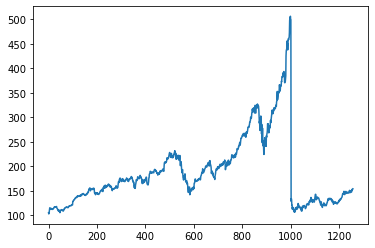

In [16]:
plt.plot(new_df)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0,1))
new_df = scale.fit_transform(np.array(new_df).reshape(-1,1))

In [25]:
new_df

array([[0.00593111],
       [0.        ],
       [0.00573258],
       ...,
       [0.12254318],
       [0.12537225],
       [0.12698531]])

In [26]:
train_size = int(len(new_df)*0.65)

In [27]:
train_size

817

In [28]:
test_size = len(new_df)-train_size

In [29]:
test_size

440

In [32]:
train_data,test_data = new_df[0:train_size,:],new_df[train_size:,:1]

In [33]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [34]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [35]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [37]:
from tensorflow.keras.layers import Dense,Flatten,LSTM
from tensorflow.keras.models import Model,Sequential

In [39]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(X_train,y_train,validation_data=(X_test,ytest), epochs=100, batch_size = 64, verbose = 1)

Epoch 1/100
12/12 [==============================] - 19s 731ms/step - loss: 0.0119 - val_loss: 0.0387
Epoch 2/100
12/12 [==============================] - 7s 629ms/step - loss: 0.0026 - val_loss: 0.0275
Epoch 3/100
12/12 [==============================] - 7s 539ms/step - loss: 0.0014 - val_loss: 0.0231
Epoch 4/100
12/12 [==============================] - 5s 448ms/step - loss: 8.5306e-04 - val_loss: 0.0215
Epoch 5/100
12/12 [==============================] - 6s 496ms/step - loss: 5.6763e-04 - val_loss: 0.0238
Epoch 6/100
12/12 [==============================] - 5s 451ms/step - loss: 5.1683e-04 - val_loss: 0.0217
Epoch 7/100
12/12 [==============================] - 7s 555ms/step - loss: 4.8030e-04 - val_loss: 0.0208
Epoch 8/100
12/12 [==============================] - 7s 558ms/step - loss: 4.7143e-04 - val_loss: 0.0209
Epoch 9/100
12/12 [==============================] - 5s 448ms/step - loss: 4.5650e-04 - val_loss: 0.0205
Epoch 10/100
12/12 [==============================] - 6s 524ms/ste

12/12 [==============================] - 7s 575ms/step - loss: 1.5650e-04 - val_loss: 0.0108
Epoch 79/100
12/12 [==============================] - 5s 455ms/step - loss: 1.5333e-04 - val_loss: 0.0122
Epoch 80/100
12/12 [==============================] - 7s 546ms/step - loss: 1.6635e-04 - val_loss: 0.0109
Epoch 81/100
12/12 [==============================] - 6s 515ms/step - loss: 1.6573e-04 - val_loss: 0.0120
Epoch 82/100
12/12 [==============================] - 6s 527ms/step - loss: 1.5412e-04 - val_loss: 0.0108
Epoch 83/100
12/12 [==============================] - 7s 565ms/step - loss: 1.4647e-04 - val_loss: 0.0100
Epoch 84/100
12/12 [==============================] - 5s 423ms/step - loss: 1.9781e-04 - val_loss: 0.0156
Epoch 85/100
12/12 [==============================] - 6s 542ms/step - loss: 1.9976e-04 - val_loss: 0.0094
Epoch 86/100
12/12 [==============================] - 7s 564ms/step - loss: 1.9724e-04 - val_loss: 0.0099
Epoch 87/100
12/12 [==============================] - 5s 46

In [42]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [43]:
train_predict=scale.inverse_transform(train_predict)
test_predict=scale.inverse_transform(test_predict)

In [44]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

185.264650597884

In [45]:
math.sqrt(mean_squared_error(ytest,test_predict))

229.08299567066132

In [46]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [47]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [50]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.07869267 0.07439944 0.07536728 0.07149593 0.07740222 0.07839488
 0.07757594 0.07556581 0.07531765 0.07030474 0.07298491 0.06134604
 0.06196645 0.06603633 0.0672027  0.0588644  0.05653167 0.04873933
 0.05419893 0.06035338 0.05742505 0.05390113 0.05350407 0.06000596
 0.05534048 0.05948481 0.05898849 0.0588644  0.05496824 0.05330554
 0.0524866  0.05442228 0.05065019 0.05648203 0.05650685 0.05859142
 0.05955926 0.05702799 0.06010522 0.06787274 0.06578817 0.0670538
 0.07112368 0.06782311 0.07238932 0.07655847 0.07586361 0.07514393
 0.07439944 0.07854378 0.08239031 0.08395374 0.08472305 0.09139865
 0.09651082 0.10283899 0.09953842 0.10417907 0.10266528 0.10549434
 0.11420488 0.11254219 0.10735557 0.09757792 0.10675998 0.10489875
 0.10837304 0.11274072 0.11380782 0.10829859 0.10385646 0.10549434
 0.1060403  0.10519655 0.10976276 0.10874528 0.10901826 0.10673516
 0.10661108 0.10539508 0.1060403  0.11355966 0.1140808  0.11909371
 0.11678579 0.10728112 0.10812488 0.11182251 0.1155

7 day output [[0.13321118]]
8 day input [0.07531765 0.07030474 0.07298491 0.06134604 0.06196645 0.06603633
 0.0672027  0.0588644  0.05653167 0.04873933 0.05419893 0.06035338
 0.05742505 0.05390113 0.05350407 0.06000596 0.05534048 0.05948481
 0.05898849 0.0588644  0.05496824 0.05330554 0.0524866  0.05442228
 0.05065019 0.05648203 0.05650685 0.05859142 0.05955926 0.05702799
 0.06010522 0.06787274 0.06578817 0.0670538  0.07112368 0.06782311
 0.07238932 0.07655847 0.07586361 0.07514393 0.07439944 0.07854378
 0.08239031 0.08395374 0.08472305 0.09139865 0.09651082 0.10283899
 0.09953842 0.10417907 0.10266528 0.10549434 0.11420488 0.11254219
 0.10735557 0.09757792 0.10675998 0.10489875 0.10837304 0.11274072
 0.11380782 0.10829859 0.10385646 0.10549434 0.1060403  0.10519655
 0.10976276 0.10874528 0.10901826 0.10673516 0.10661108 0.10539508
 0.1060403  0.11355966 0.1140808  0.11909371 0.11678579 0.10728112
 0.10812488 0.11182251 0.1155946  0.11537125 0.11224439 0.11020945
 0.11283998 0.12405698

 0.13702048 0.1378199  0.13863118 0.13945274]
16 day output [[0.14028306]]
17 day input [0.04873933 0.05419893 0.06035338 0.05742505 0.05390113 0.05350407
 0.06000596 0.05534048 0.05948481 0.05898849 0.0588644  0.05496824
 0.05330554 0.0524866  0.05442228 0.05065019 0.05648203 0.05650685
 0.05859142 0.05955926 0.05702799 0.06010522 0.06787274 0.06578817
 0.0670538  0.07112368 0.06782311 0.07238932 0.07655847 0.07586361
 0.07514393 0.07439944 0.07854378 0.08239031 0.08395374 0.08472305
 0.09139865 0.09651082 0.10283899 0.09953842 0.10417907 0.10266528
 0.10549434 0.11420488 0.11254219 0.10735557 0.09757792 0.10675998
 0.10489875 0.10837304 0.11274072 0.11380782 0.10829859 0.10385646
 0.10549434 0.1060403  0.10519655 0.10976276 0.10874528 0.10901826
 0.10673516 0.10661108 0.10539508 0.1060403  0.11355966 0.1140808
 0.11909371 0.11678579 0.10728112 0.10812488 0.11182251 0.1155946
 0.11537125 0.11224439 0.11020945 0.11283998 0.12405698 0.12085567
 0.12254318 0.12537225 0.12698531 0.1246197

25 day output [[0.14789668]]
26 day input [0.05898849 0.0588644  0.05496824 0.05330554 0.0524866  0.05442228
 0.05065019 0.05648203 0.05650685 0.05859142 0.05955926 0.05702799
 0.06010522 0.06787274 0.06578817 0.0670538  0.07112368 0.06782311
 0.07238932 0.07655847 0.07586361 0.07514393 0.07439944 0.07854378
 0.08239031 0.08395374 0.08472305 0.09139865 0.09651082 0.10283899
 0.09953842 0.10417907 0.10266528 0.10549434 0.11420488 0.11254219
 0.10735557 0.09757792 0.10675998 0.10489875 0.10837304 0.11274072
 0.11380782 0.10829859 0.10385646 0.10549434 0.1060403  0.10519655
 0.10976276 0.10874528 0.10901826 0.10673516 0.10661108 0.10539508
 0.1060403  0.11355966 0.1140808  0.11909371 0.11678579 0.10728112
 0.10812488 0.11182251 0.1155946  0.11537125 0.11224439 0.11020945
 0.11283998 0.12405698 0.12085567 0.12254318 0.12537225 0.12698531
 0.1246197  0.1246197  0.12779522 0.12877285 0.12958299 0.13032292
 0.13104138 0.13175845 0.13248098 0.13321118 0.13395017 0.13469943
 0.13546032 0.136233

In [51]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

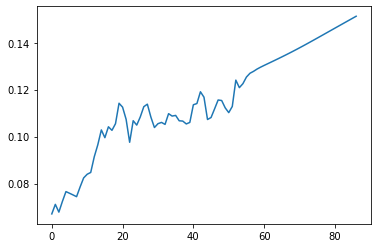

In [54]:
df1=new_df.tolist()
df1.extend(lst_output)
plt.plot(df1[1200:])

In [56]:
df1=scale.inverse_transform(df1).tolist()

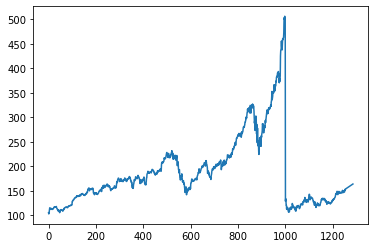

In [57]:
plt.plot(df1)